In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [17]:
import pandas as pd
df = pd.read_csv('twitter-stocks.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-11-07,45.099998,50.090000,44.000000,44.900002,44.900002,117701670.0
1,2013-11-08,45.930000,46.939999,40.685001,41.650002,41.650002,27925307.0
2,2013-11-11,40.500000,43.000000,39.400002,42.900002,42.900002,16113941.0
3,2013-11-12,43.660000,43.779999,41.830002,41.900002,41.900002,6316755.0
4,2013-11-13,41.029999,42.869999,40.759998,42.599998,42.599998,8688325.0


In [18]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2259 entries, 0 to 2258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2259 non-null   object 
 1   Open       2259 non-null   float64
 2   High       2259 non-null   float64
 3   Low        2259 non-null   float64
 4   Close      2259 non-null   float64
 5   Adj Close  2259 non-null   float64
 6   Volume     2259 non-null   float64
dtypes: float64(6), object(1)
memory usage: 123.7+ KB


In [20]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
X = df[['Open','High','Low','Volume','Adj Close']]
y = df['Close']

In [8]:
X_train,X_test , y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [21]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=5),
    "SVM Regressor": SVR(kernel='rbf'),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42)
}

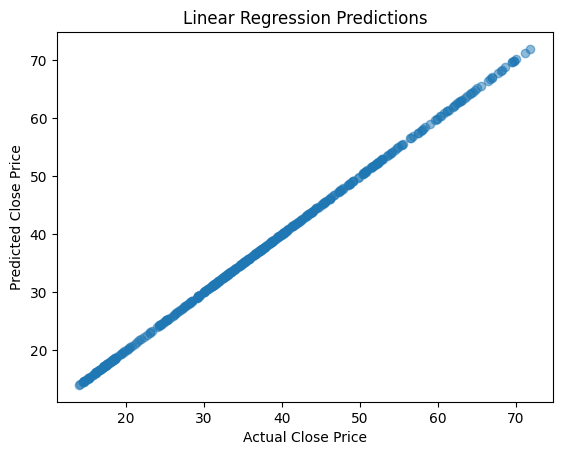

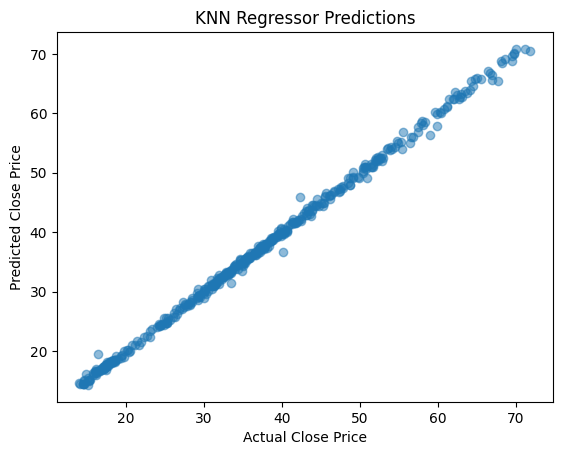

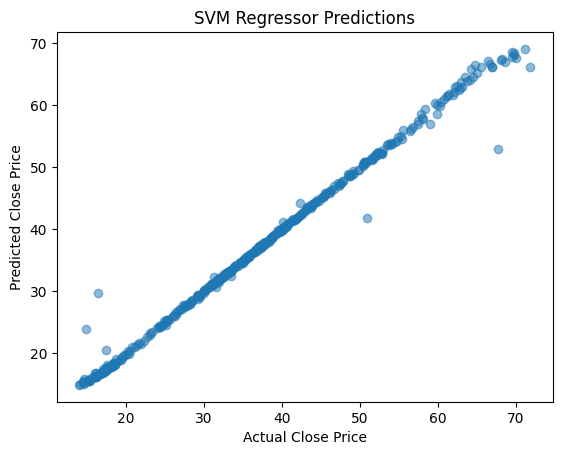

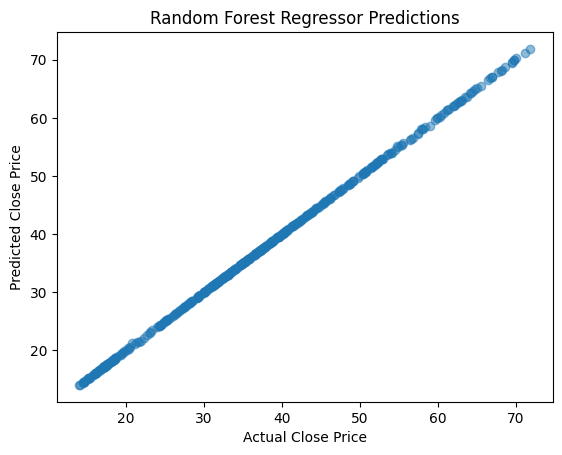

In [26]:
# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    results[name] = {
        "R2 Score": r2_score(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred)
    }
        # Plot Predictions
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.xlabel("Actual Close Price")
    plt.ylabel("Predicted Close Price")
    plt.title(f"{name} Predictions")
    plt.show()


In [27]:
# Display results
for model, metrics in results.items():
    print(f"{model} - R2: {metrics['R2 Score']:.4f}, MSE: {metrics['MSE']:.4f}, MAE: {metrics['MAE']:.4f}")

Linear Regression - R2: 1.0000, MSE: 0.0000, MAE: 0.0000
KNN Regressor - R2: 0.9985, MSE: 0.3053, MAE: 0.3543
SVM Regressor - R2: 0.9925, MSE: 1.5020, MAE: 0.3543
Random Forest Regressor - R2: 1.0000, MSE: 0.0039, MAE: 0.0306


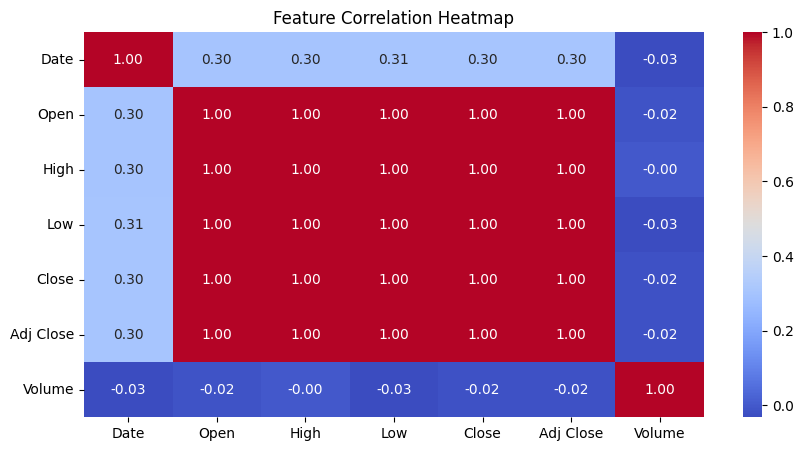

In [28]:
# --- Additional Plots ---
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

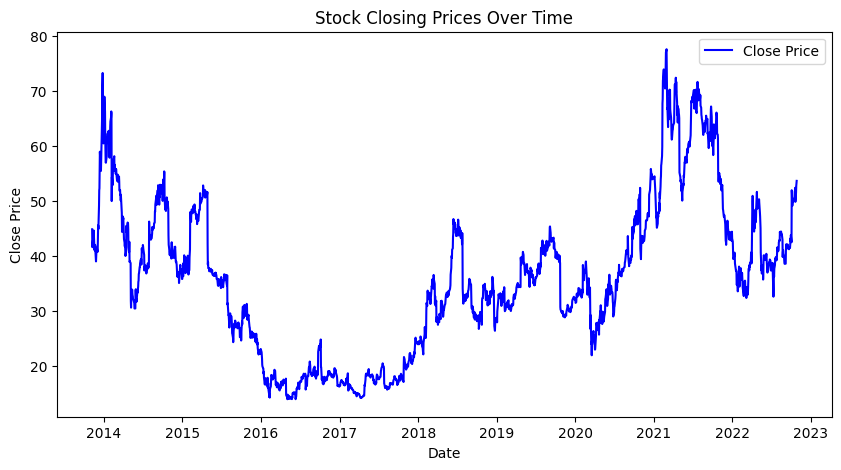

In [29]:
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Stock Closing Prices Over Time")
plt.legend()
plt.show()

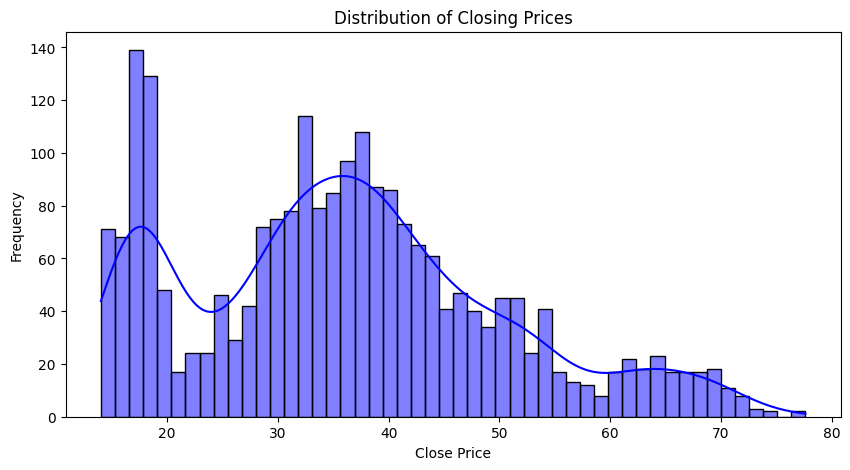

In [30]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Close'], bins=50, kde=True, color='blue')
plt.title("Distribution of Closing Prices")
plt.xlabel("Close Price")
plt.ylabel("Frequency")
plt.show()

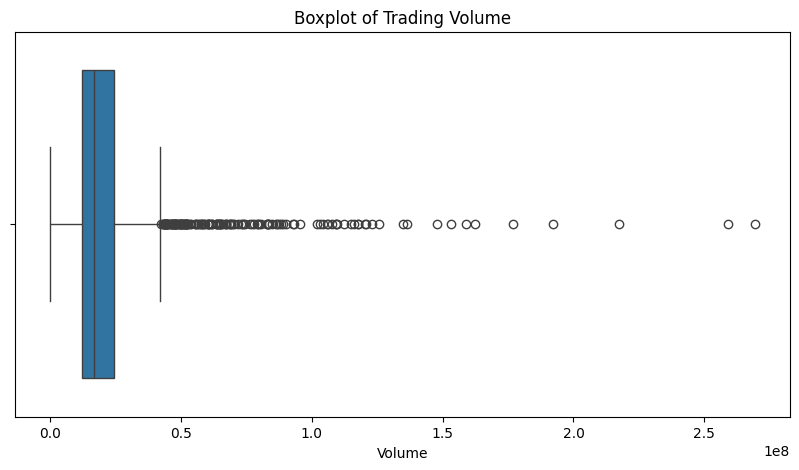

In [31]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Volume'])
plt.title("Boxplot of Trading Volume")
plt.xlabel("Volume")
plt.show()

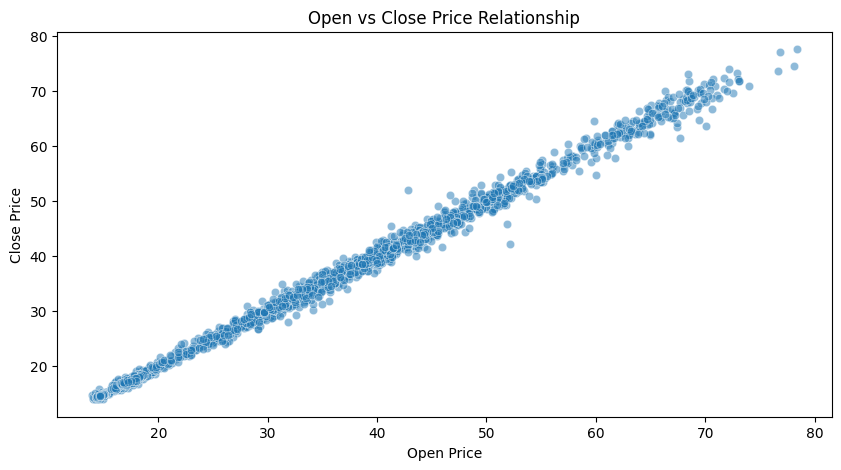

In [32]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['Open'], y=df['Close'], alpha=0.5)
plt.xlabel("Open Price")
plt.ylabel("Close Price")
plt.title("Open vs Close Price Relationship")
plt.show()